In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Import Data

In [2]:
data = pd.read_csv('/Users/borhandarvishi/Desktop/pc/ML/Projects/ds_salaries.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## Tips

#### experience_level	has 4 Level:
###### EN > Entry-level / Junior
###### MI >  Mid-level / Intermediate
###### SE > Senior-level / Expert
###### EX > Executive-level / Director

#### employment_type has 4 types:
###### PT > Part-time
###### FT > Full-time
###### CT > Contract
###### FL > Freelance

## Analysis data

In [5]:
df.info()
#information about types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.isnull().sum()
#check missing values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Plots

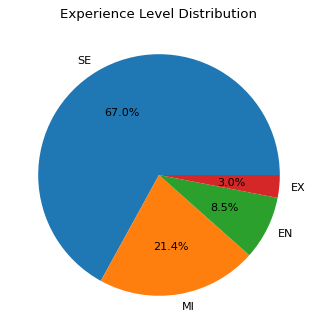

In [9]:
plt.figure(figsize=(6,5),dpi=80)
# calculate the number of individuals in each experience level
level_counts = df['experience_level'].value_counts()

# create a pie chart
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')

# add title
plt.title('Experience Level Distribution')

# display plot
plt.show()

In [11]:
# There are so many job titles, we have to choose some of them

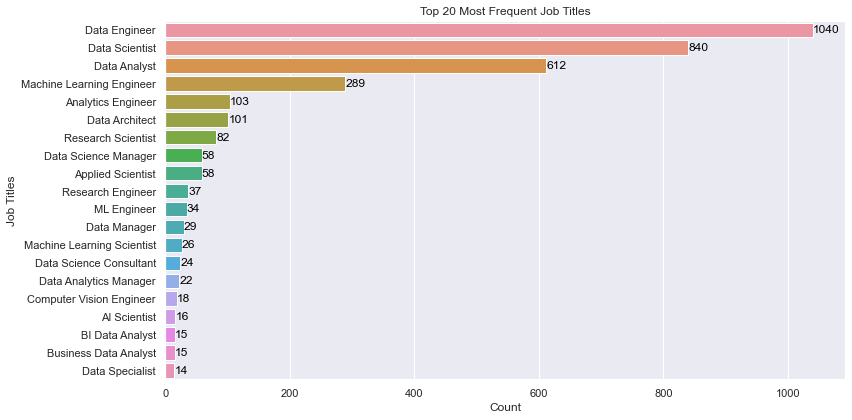

In [17]:

# Extract the "job title" column
job_titles = df['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


#### categorical

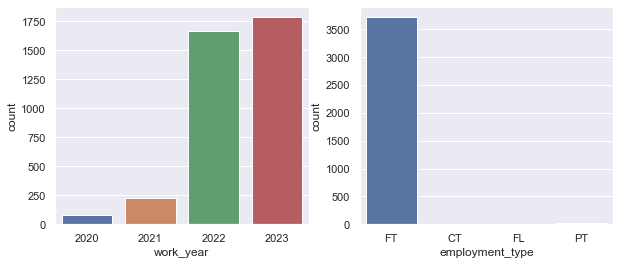

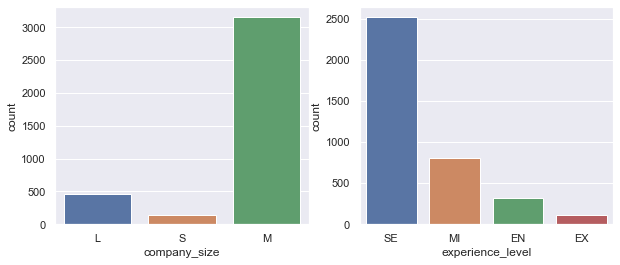

In [19]:
categorical = ['work_year','employment_type','company_size','experience_level']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i],data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i],data=df)
    i += 1
    plt.show()

#### numerical

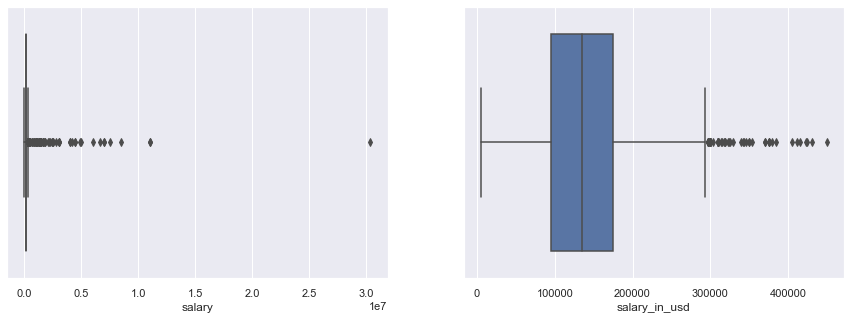

In [28]:
numerical = ['salary','salary_in_usd']
i = 0
while i < 2:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=numerical[i],data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=numerical[i],data=df)
    i += 1
    plt.show()

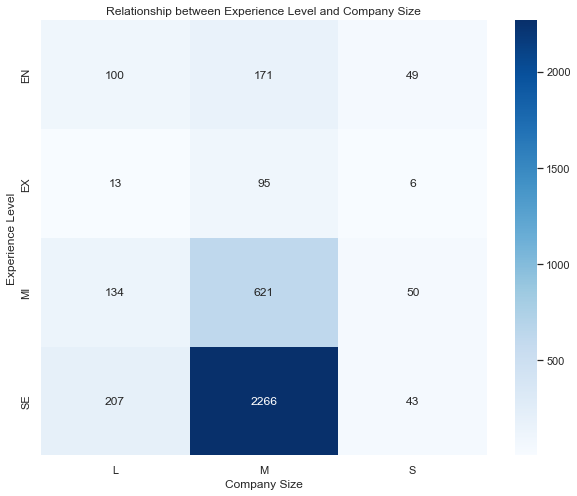

In [21]:
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(df['experience_level'], df['company_size'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Blues')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Relationship between Experience Level and Company Size')

plt.show()

# I will probably make this analysis more complete..